In [92]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

UserType=[[7,3], [5,8], [3,9], [1,9], [6,7]]
NewUser=[[4,1]]
GameStyle=[1]*3 + [2]*2

kn.fit(UserType, GameStyle)
score = kn.score(UserType, GameStyle)
print(score)

0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [2]:
import pandas as pd

userDataDf = pd.read_csv('testUserData.csv').dropna()

userDataDf.head()

,MembersNo,Day,TimeSlot,PlayTime,PreferedGame,Gender,Age,UserType
0,1,2,2,5,1,1,26,1
1,2,1,3,4,4,2,22,3
2,3,3,4,5,2,1,25,1
3,4,1,3,2,4,2,33,3
4,5,1,1,3,3,1,31,1


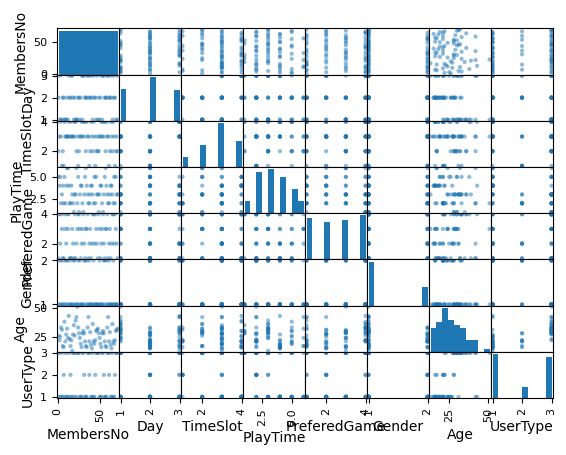

In [94]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(userDataDf, diagonal='hist')
plt.show()

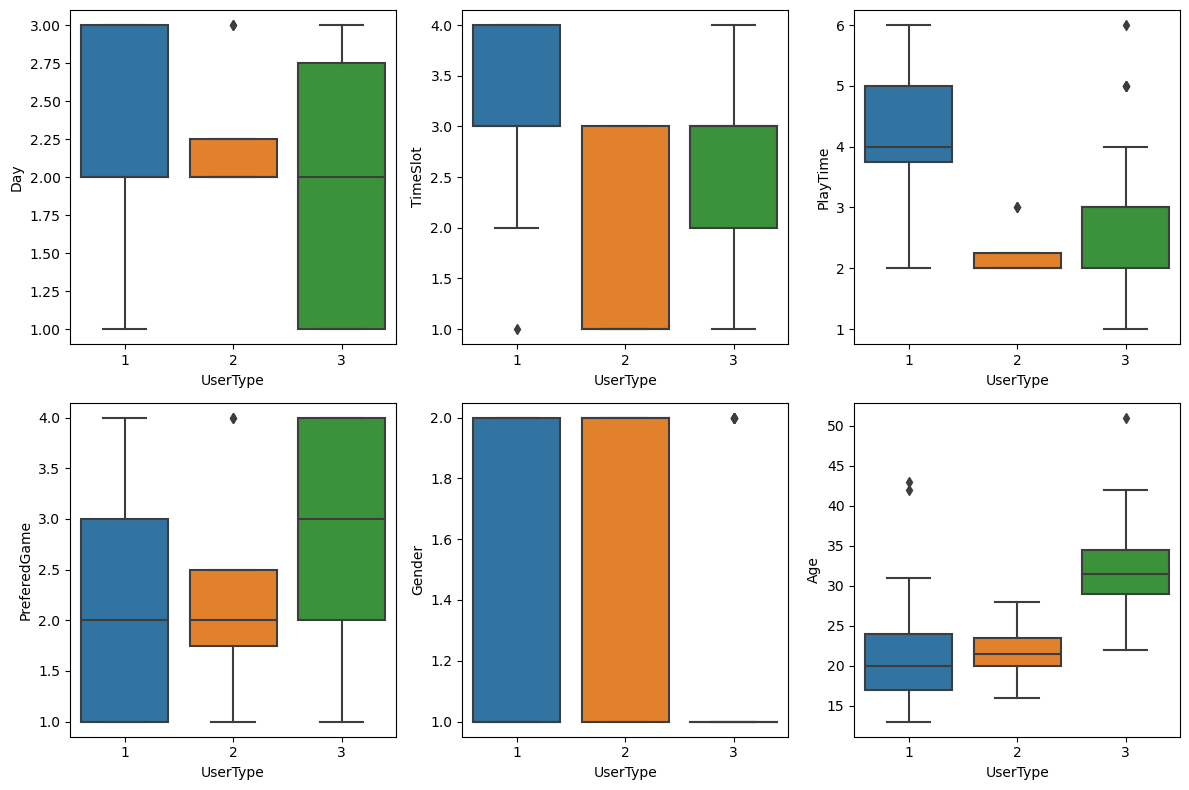

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'UserType'을 label로 사용하여 학습한 KNN 모델 kn을 만든 경우
features = ['Day', 'TimeSlot', 'PlayTime', 'PreferedGame', 'Gender', 'Age']
label = 'UserType'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=label, y=userDataDf[features[i]], data=userDataDf, ax=ax)

plt.tight_layout()
plt.show()

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

userDataDf = pd.read_csv('testUserData.csv').dropna()
# day, timeslot, preferedgame, gender 열을 더미 변수로 변환
dummy_cols = ['Day', 'TimeSlot', 'PreferedGame', 'Gender']
userDataDf = pd.get_dummies(userDataDf, columns=dummy_cols)

# 데이터 프레임에서 feature와 label을 나누기
X = userDataDf.drop(['UserType', 'MembersNo'], axis=1)
y = userDataDf['UserType']

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 학습
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dt.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         9
           2       0.00      0.00      0.00         0
           3       0.71      1.00      0.83         5

    accuracy                           0.79        14
   macro avg       0.57      0.56      0.54        14
weighted avg       0.90      0.79      0.81        14



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


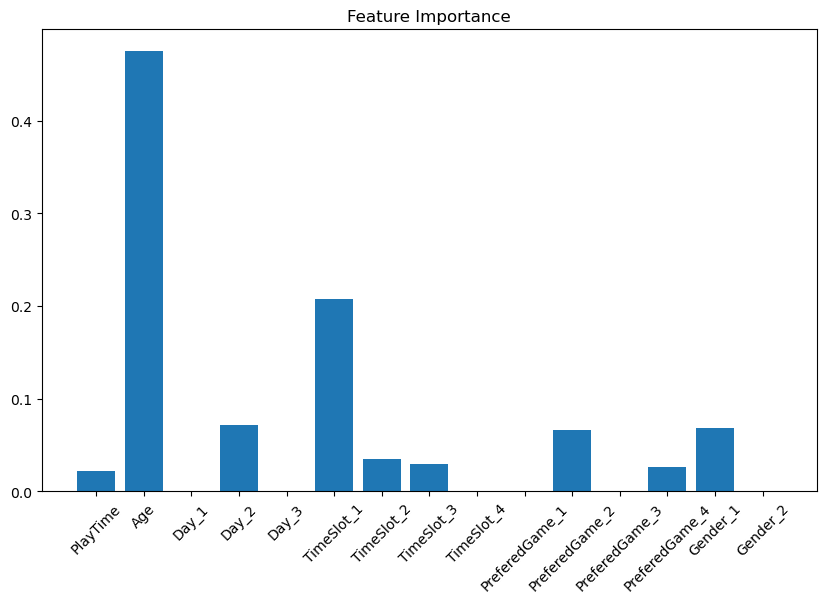

In [112]:
import matplotlib.pyplot as plt

# feature 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, dt.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# feature와 target 데이터 분리
X = data[['Day', 'TimeSlot', 'PlayTime', 'PreferedGame', 'Gender', 'Age']]
y = data['UserType']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
# print(y_test, y_pred)
print(y_pred)
print('Accuracy:', accuracy)

[3 3 1 3 1 3 3 1 3 3 1 3 3 1 1 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 3 1 1 1 3
 3 1 1 1 1 1 3 3 1 1 1 1 3 3 1 3 1 1 1]
Accuracy: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# 데이터셋 로드
testUserData_df = pd.read_csv('testUserData.CSV')
testUserData_df.sample(4)

,MembersNo,Day,TimeSlot,PlayTime,PreferedGame,Gender,Age,UserType
6,7,2,1,2,1,2,16,2
24,25,2,2,1,4,1,28,3
4,5,1,1,3,3,1,31,1
44,45,1,2,5,3,1,30,3


In [19]:
testUserDataEx_df = pd.read_csv('testUserDataEx.CSV').drop(columns=['Gender', 'Age'])
testUserDataEx_df

,MembersNo,PlayedDay,TimeSlot,PlayTime,PlayedGame
0,1,2,2,5,1
1,2,1,3,4,4
2,1,2,3,4,2
3,3,3,4,5,2
4,1,2,3,5,1
5,4,1,3,2,4
6,5,1,1,3,3


In [20]:
testUserDataEx_df[testUserDataEx_df['MembersNo']==1]

,MembersNo,PlayedDay,TimeSlot,PlayTime,PlayedGame
0,1,2,2,5,1
2,1,2,3,4,2
4,1,2,3,5,1


In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 샘플 데이터 생성
data = {'play_time': [2, 4, 3, 5, 6],
        'play_day': ['weekday', 'weekend', 'weekday', 'weekday', 'weekend'],
        'play_time_slot': ['morning', 'evening', 'afternoon', 'evening', 'night'],
        'favorite_game': ['RPG', 'FPS', 'MOBA', 'RPG', 'RPG'],
        'gender': ['M', 'F', 'M', 'M', 'F'],
        'age': [25, 30, 20, 35, 40],
        'goal_oriented': [1, 0, 1, 0, 0],
        'learning_oriented': [1, 1, 0, 1, 0],
        'relationship_oriented': [0, 1, 1, 0, 1]}

df = pd.DataFrame(data)

# 범주형 데이터를 더미(dummy) 변수로 변환
df = pd.get_dummies(df, columns=['play_day', 'play_time_slot', 'favorite_game', 'gender'])

# 벡터화
user_vectors = df[['play_time', 'age', 'goal_oriented', 'learning_oriented', 'relationship_oriented',
                   'play_day_weekday', 'play_day_weekend', 'play_time_slot_afternoon',
                   'play_time_slot_evening', 'play_time_slot_morning', 'play_time_slot_night',
                   'favorite_game_FPS', 'favorite_game_MOBA', 'favorite_game_RPG',
                   'gender_F', 'gender_M']].values.tolist()

print(user_vectors)

[[2, 25, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [4, 30, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [3, 20, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [5, 35, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [6, 40, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]]


In [30]:
# 벡터화된 데이터의 코사인 유사도 계산
vector_similarity = cosine_similarity(user_vectors)

# 예시로 첫 번째 유저와 나머지 유저들간의 코사인 유사도를 출력
print(vector_similarity[1])

[0.99194925 1.         0.99099386 0.9965692  0.99752735]


In [ ]:
import pandas as pd

# 샘플 데이터 생성
data = {'play_time': [2, 4, 3, 5, 6],
        'play_day': ['weekday', 'weekend', 'weekday', 'weekday', 'weekend'],
        'play_time_slot': ['morning', 'evening', 'afternoon', 'evening', 'night'],
        'favorite_game': ['RPG', 'FPS', 'MOBA', 'RPG', 'RPG'],
        'gender': ['M', 'F', 'M', 'M', 'F'],
        'age': [25, 30, 20, 35, 40],
        'goal_oriented': [1, 0, 1, 0, 0],
        'learning_oriented': [1, 1, 0, 1, 0],
        'relationship_oriented': [0, 1, 1, 0, 1]}

df = pd.DataFrame(data)

# 범주형 데이터를 더미(dummy) 변수로 변환
df = pd.get_dummies(df, columns=['play_day', 'play_time_slot', 'favorite_game', 'gender'])

# 벡터화
user_vectors = df[['play_time', 'age', 'goal_oriented', 'learning_oriented', 'relationship_oriented',
                   'play_day_weekday', 'play_day_weekend', 'play_time_slot_afternoon',
                   'play_time_slot_evening', 'play_time_slot_morning', 'play_time_slot_night',
                   'favorite_game_FPS', 'favorite_game_MOBA', 'favorite_game_RPG',
                   'gender_F', 'gender_M']].values.tolist()

print(user_vectors)

In [35]:
import pandas as pd

# 샘플 데이터 생성
data = {'play_time': [2, 4, 3, 5, 6],
        'play_day': [1, 1, 2, 1, 3],
        'play_time_slot': [1, 3, 2, 3, 4],
        'favorite_game': [1, 2, 3, 4, 4],
        'gender': [1, 2, 1, 1, 2],
        'age': [25, 30, 20, 35, 40],
        'goal_oriented': [0, 0, 1, 0, 1],
        'learning_oriented': [1, 1, 1, 1, 0],
        'relationship_oriented': [1, 1, 1, 0, 1]}

df = pd.DataFrame(data)

print(user_vectors)
# 벡터화된 데이터의 코사인 유사도 계산
vector_similarity = cosine_similarity(user_vectors)

# 예시로 첫 번째 유저와 나머지 유저들간의 코사인 유사도를 출력
print(vector_similarity[4])

[[2, 25, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [4, 30, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [3, 20, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [5, 35, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [6, 40, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]]
[0.99235781 0.99752735 0.99244298 0.99715686 1.        ]


In [36]:
import pandas as pd

# 샘플 데이터 생성
data = {'play_time': [2, 4, 3, 5, 6],
        'play_day': [1, 1, 2, 1, 3],
        'play_time_slot': [1, 3, 2, 3, 4],
        'favorite_game': [1, 2, 3, 4, 4],
        'gender': [1, 2, 1, 1, 2],
        'age': [25, 30, 20, 35, 40],
        'play_style': [1, 3, 2, 3, 1],
        }

df = pd.DataFrame(data)

print(user_vectors)
# 벡터화된 데이터의 코사인 유사도 계산
vector_similarity = cosine_similarity(user_vectors)

# 예시로 첫 번째 유저와 나머지 유저들간의 코사인 유사도를 출력
print(vector_similarity[4])

[[2, 25, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [4, 30, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [3, 20, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [5, 35, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [6, 40, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]]
[0.99235781 0.99752735 0.99244298 0.99715686 1.        ]


In [39]:
data = {'play_time': [2, 4, 3, 5, 6],
        'play_day': [1, 1, 2, 1, 3],
        'play_time_slot': [1, 3, 2, 3, 4],
        'favorite_game': [1, 2, 3, 4, 4],
        'gender': [1, 2, 1, 1, 2],
        'age': [25, 30, 20, 35, 40],
        'play_style': [1, 3, 2, 3, 1],
        }

df = pd.DataFrame(data)

# 각 feature의 가중치 설정
weights = {'play_time': 0.2, 'play_day': 0.1, 'play_time_slot': 0.5, 
           'favorite_game': 0.8, 'gender': 0.5, 'age': 0.8, 'play_style': 0.9}

# 벡터화된 데이터 생성
user_vectors = []
for idx, row in df.iterrows():
    vector = []
    for feature in ['play_time', 'play_day', 'play_time_slot', 'favorite_game', 'gender', 'age', 'play_style']:
        # 가중치를 곱하여 벡터에 추가
        vector.append(row[feature] * weights[feature])
    user_vectors.append(vector)

# 벡터화된 데이터의 코사인 유사도 계산
vector_similarity = cosine_similarity(user_vectors)

# 예시로 첫 번째 유저와 나머지 유저들간의 코사인 유사도를 출력
print(vector_similarity[0])

[1.         0.99652806 0.99113539 0.99548949 0.99722085]
